In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
names=['age','sex','on_thyroxine','query_on_thyroxine','on_antithyroid_medication',
       'sick','pregnant','thyroid_surgery','I131_treatment','query_hypothyroid','query_hyperthyroid',
      'lithium','goitre','tumor','hypopituitary','psych','TSH_measured','TSH','T3_measured','T3','TT4_measured','TT4','T4U_measured',
      'T4U','FTI_measured','FTI','TBG_measured','TBG','referral_source','classes']

In [3]:
df=pd.read_csv("C:\\Users\\harsha k\\Downloads\\allhypo.data",names=names,na_values='?')
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,classes
0,41.0,F,f,f,f,f,f,f,f,f,...,t,125.0,t,1.14,t,109.0,f,NaN,SVHC,negative.|3733
1,23.0,F,f,f,f,f,f,f,f,f,...,t,102.0,f,NaN,f,NaN,f,NaN,other,negative.|1442
2,46.0,M,f,f,f,f,f,f,f,f,...,t,109.0,t,0.91,t,120.0,f,NaN,other,negative.|2965
3,70.0,F,t,f,f,f,f,f,f,f,...,t,175.0,f,NaN,f,NaN,f,NaN,other,negative.|806
4,70.0,F,f,f,f,f,f,f,f,f,...,t,61.0,t,0.87,t,70.0,f,NaN,SVI,negative.|2807


# Data Pre-processing
Data manipulation

In [4]:
#Split classes column
col_mod=df.classes.str.split('.',expand=True)
df[['last','final']]=col_mod
data=df.drop(['classes','final'],axis=1)

In [5]:
df=data.rename(columns={'last':'classes'})
df.head()


,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,classes
0,41.0,F,f,f,f,f,f,f,f,f,...,t,125.0,t,1.14,t,109.0,f,NaN,SVHC,negative
1,23.0,F,f,f,f,f,f,f,f,f,...,t,102.0,f,NaN,f,NaN,f,NaN,other,negative
2,46.0,M,f,f,f,f,f,f,f,f,...,t,109.0,t,0.91,t,120.0,f,NaN,other,negative
3,70.0,F,t,f,f,f,f,f,f,f,...,t,175.0,f,NaN,f,NaN,f,NaN,other,negative
4,70.0,F,f,f,f,f,f,f,f,f,...,t,61.0,t,0.87,t,70.0,f,NaN,SVI,negative


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        2799 non-null   float64
 1   sex                        2690 non-null   object 
 2   on_thyroxine               2800 non-null   object 
 3   query_on_thyroxine         2800 non-null   object 
 4   on_antithyroid_medication  2800 non-null   object 
 5   sick                       2800 non-null   object 
 6   pregnant                   2800 non-null   object 
 7   thyroid_surgery            2800 non-null   object 
 8   I131_treatment             2800 non-null   object 
 9   query_hypothyroid          2800 non-null   object 
 10  query_hyperthyroid         2800 non-null   object 
 11  lithium                    2800 non-null   object 
 12  goitre                     2800 non-null   object 
 13  tumor                      2800 non-null   objec

In [7]:
df.describe()

,age,TSH,T3,TT4,T4U,FTI,TBG
count,2799.00000,2516.000000,2215.000000,2616.000000,2503.000000,2505.000000,0.0
mean,51.84423,4.672150,2.024966,109.072401,0.997912,110.787984,NaN
std,20.46116,21.449453,0.824600,35.392443,0.194390,32.883986,NaN
min,1.00000,0.005000,0.050000,2.000000,0.310000,2.000000,NaN
25%,36.00000,0.440000,1.600000,88.000000,0.880000,93.000000,NaN
50%,54.00000,1.400000,2.000000,104.000000,0.980000,107.000000,NaN
75%,67.00000,2.600000,2.400000,125.000000,1.080000,124.000000,NaN
max,455.00000,478.000000,10.600000,430.000000,2.120000,395.000000,NaN


In [8]:
#Save Dataframe to csv file
df.to_csv('Thyroid_Data.csv')

# Missing values handling

In [9]:
#Number of Null values in Dataset
df.isna().sum()

age                             1
sex                           110
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
sick                            0
pregnant                        0
thyroid_surgery                 0
I131_treatment                  0
query_hypothyroid               0
query_hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH_measured                    0
TSH                           284
T3_measured                     0
T3                            585
TT4_measured                    0
TT4                           184
T4U_measured                    0
T4U                           297
FTI_measured                    0
FTI                           295
TBG_measured                    0
TBG                          2800
referral_source                 0
classes       

In [10]:


#Percentage of null values in dataset
df.isna().sum()/df.shape[0]*100



age                            0.035714
sex                            3.928571
on_thyroxine                   0.000000
query_on_thyroxine             0.000000
on_antithyroid_medication      0.000000
sick                           0.000000
pregnant                       0.000000
thyroid_surgery                0.000000
I131_treatment                 0.000000
query_hypothyroid              0.000000
query_hyperthyroid             0.000000
lithium                        0.000000
goitre                         0.000000
tumor                          0.000000
hypopituitary                  0.000000
psych                          0.000000
TSH_measured                   0.000000
TSH                           10.142857
T3_measured                    0.000000
T3                            20.892857
TT4_measured                   0.000000
TT4                            6.571429
T4U_measured                   0.000000
T4U                           10.607143
FTI_measured                   0.000000


In [11]:
#TBG having 100% null values so will drop that column
df=df.drop('TBG',axis=1)

In [12]:
categorical_features=df.select_dtypes(exclude='number')
categorical_features.describe()

,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,...,hypopituitary,psych,TSH_measured,T3_measured,TT4_measured,T4U_measured,FTI_measured,TBG_measured,referral_source,classes
count,2690,2800,2800,2800,2800,2800,2800,2800,2800,2800,...,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,1,5,4
top,F,f,f,f,f,f,f,f,f,f,...,f,f,t,t,t,t,t,f,other,negative
freq,1830,2470,2760,2766,2690,2759,2761,2752,2637,2627,...,2799,2665,2516,2215,2616,2503,2505,2800,1632,2580


In [13]:
# Checking all the unique values inside categorical features
for feature in categorical_features:
    print('---------------------------------')
    print(f"{feature}:{categorical_features[feature].unique()}")

---------------------------------
sex:['F' 'M' nan]
---------------------------------
on_thyroxine:['f' 't']
---------------------------------
query_on_thyroxine:['f' 't']
---------------------------------
on_antithyroid_medication:['f' 't']
---------------------------------
sick:['f' 't']
---------------------------------
pregnant:['f' 't']
---------------------------------
thyroid_surgery:['f' 't']
---------------------------------
I131_treatment:['f' 't']
---------------------------------
query_hypothyroid:['f' 't']
---------------------------------
query_hyperthyroid:['f' 't']
---------------------------------
lithium:['f' 't']
---------------------------------
goitre:['f' 't']
---------------------------------
tumor:['f' 't']
---------------------------------
hypopituitary:['f' 't']
---------------------------------
psych:['f' 't']
---------------------------------
TSH_measured:['t' 'f']
---------------------------------
T3_measured:['t' 'f']
---------------------------------
TT4_

<AxesSubplot:xlabel='classes', ylabel='FTI'>

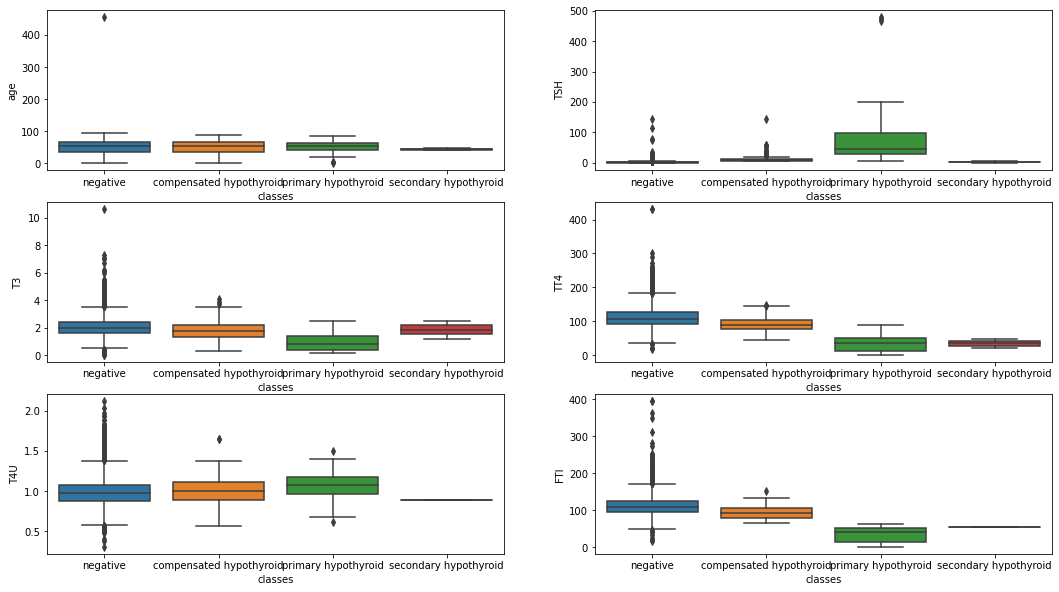

In [14]:
#Check for outliers

fig, axes = plt.subplots(3,2, figsize=(18, 10))
  

sns.boxplot(ax=axes[0, 0], data=df, x='classes', y='age')
sns.boxplot(ax=axes[0, 1], data=df, x='classes', y='TSH')
sns.boxplot(ax=axes[1, 0], data=df, x='classes', y='T3')
sns.boxplot(ax=axes[1, 1], data=df, x='classes', y='TT4')
sns.boxplot(ax=axes[2, 0], data=df, x='classes', y='T4U')
sns.boxplot(ax=axes[2, 1], data=df, x='classes', y='FTI')

there are outliers in dataset so will use median to fill null values in numerical and mode for categorical data

In [15]:
from sklearn.impute import SimpleImputer

#Handle numerical features
simple_imputer=SimpleImputer(strategy='median')
numerical_missing=pd.DataFrame(simple_imputer.fit_transform(df.select_dtypes(exclude='O')))

#Handle categorical features
cat_imputation=SimpleImputer(strategy='most_frequent')
categorical_missing=pd.DataFrame(cat_imputation.fit_transform(df.select_dtypes(exclude='number')))

numerical_missing.columns=df.select_dtypes(exclude='O').columns
categorical_missing.columns=df.select_dtypes(exclude='number').columns

data=pd.concat([numerical_missing,categorical_missing],axis=1)

In [16]:
data.head()

,age,TSH,T3,TT4,T4U,FTI,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,...,hypopituitary,psych,TSH_measured,T3_measured,TT4_measured,T4U_measured,FTI_measured,TBG_measured,referral_source,classes
0,41.0,1.30,2.5,125.0,1.14,109.0,F,f,f,f,...,f,f,t,t,t,t,t,f,SVHC,negative
1,23.0,4.10,2.0,102.0,0.98,107.0,F,f,f,f,...,f,f,t,t,t,f,f,f,other,negative
2,46.0,0.98,2.0,109.0,0.91,120.0,M,f,f,f,...,f,f,t,f,t,t,t,f,other,negative
3,70.0,0.16,1.9,175.0,0.98,107.0,F,t,f,f,...,f,f,t,t,t,f,f,f,other,negative
4,70.0,0.72,1.2,61.0,0.87,70.0,F,f,f,f,...,f,f,t,t,t,t,t,f,SVI,negative


In [17]:
data.isnull().sum()

age                          0
TSH                          0
T3                           0
TT4                          0
T4U                          0
FTI                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH_measured                 0
T3_measured                  0
TT4_measured                 0
T4U_measured                 0
FTI_measured                 0
TBG_measured                 0
referral_source              0
classes                      0
dtype: int64


Outliers detection and removal

Since all the numerical features not following Normal distribution, will use percentile method to detect the outliers and remove them

In [18]:
data[data.age>100]

,age,TSH,T3,TT4,T4U,FTI,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,...,hypopituitary,psych,TSH_measured,T3_measured,TT4_measured,T4U_measured,FTI_measured,TBG_measured,referral_source,classes
1364,455.0,1.1,2.0,118.0,1.13,104.0,F,f,f,f,...,f,f,t,t,t,t,t,f,SVI,negative


In [19]:
data=data.drop(data.age.index[1364])

In [20]:
def outliers_removal(numerical_missing):
    for column in numerical_missing:
        sort=np.sort(numerical_missing[column])
        lower_limit,upper_limit=np.percentile(sort,[0,95])
        detected_outliers=numerical_missing.iloc[np.where((numerical_missing[column]>upper_limit) | (numerical_missing[column]<lower_limit))]
        return detected_outliers

In [21]:
outliers_data=outliers_removal(data)
outliers_data

,age,TSH,T3,TT4,T4U,FTI,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,...,hypopituitary,psych,TSH_measured,T3_measured,TT4_measured,T4U_measured,FTI_measured,TBG_measured,referral_source,classes
7,80.0,2.20,0.6,80.0,0.70,115.0,F,f,f,f,...,f,f,t,t,t,t,t,f,SVI,negative
10,84.0,1.10,2.2,115.0,0.95,121.0,F,f,f,f,...,f,f,t,t,t,t,t,f,SVI,negative
18,80.0,6.00,1.6,99.0,0.95,104.0,F,f,f,f,...,f,t,t,t,t,t,t,f,SVI,negative
22,81.0,1.90,0.3,102.0,0.96,106.0,M,f,f,f,...,f,f,t,t,t,t,t,f,SVI,negative
34,85.0,7.30,2.4,66.0,1.09,61.0,F,f,f,f,...,f,f,t,t,t,t,t,f,other,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2773,84.0,3.60,0.6,82.0,0.74,110.0,M,f,f,f,...,f,t,t,t,t,t,t,f,SVI,negative
2774,82.0,2.20,1.0,68.0,0.77,88.0,M,f,f,f,...,f,f,t,t,t,t,t,f,SVI,negative
2783,82.0,0.50,2.0,125.0,0.84,149.0,F,f,f,f,...,f,f,t,f,t,t,t,f,other,negative
2793,82.0,0.03,1.4,74.0,0.52,143.0,F,f,f,f,...,f,f,t,t,t,t,t,f,other,negative


In [22]:
new_df=data.drop(outliers_data.index)
new_df.head()

,age,TSH,T3,TT4,T4U,FTI,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,...,hypopituitary,psych,TSH_measured,T3_measured,TT4_measured,T4U_measured,FTI_measured,TBG_measured,referral_source,classes
0,41.0,1.30,2.5,125.0,1.14,109.0,F,f,f,f,...,f,f,t,t,t,t,t,f,SVHC,negative
1,23.0,4.10,2.0,102.0,0.98,107.0,F,f,f,f,...,f,f,t,t,t,f,f,f,other,negative
2,46.0,0.98,2.0,109.0,0.91,120.0,M,f,f,f,...,f,f,t,f,t,t,t,f,other,negative
3,70.0,0.16,1.9,175.0,0.98,107.0,F,t,f,f,...,f,f,t,t,t,f,f,f,other,negative
4,70.0,0.72,1.2,61.0,0.87,70.0,F,f,f,f,...,f,f,t,t,t,t,t,f,SVI,negative


In [23]:
new_df.shape

(2666, 29)

In [24]:
new_df.columns

Index(['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'sex', 'on_thyroxine',
       'query_on_thyroxine', 'on_antithyroid_medication', 'sick', 'pregnant',
       'thyroid_surgery', 'I131_treatment', 'query_hypothyroid',
       'query_hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary',
       'psych', 'TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured',
       'FTI_measured', 'TBG_measured', 'referral_source', 'classes'],
      dtype='object')

In [25]:
new_df.to_csv('Preprocessed_data.csv',index=False)

In [26]:
X = new_df.iloc[: , 0:-1]
Y = new_df.iloc[: , -1] 


Splitting the dataset into the Training set and Test set

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=1)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape


((2132, 28), (534, 28), (2132,), (534,))

Encoding categorical data

Encoding the Independent Variable

In [29]:
from sklearn.preprocessing import StandardScaler,LabelEncoder,OrdinalEncoder

In [30]:
ordinal_encoder = OrdinalEncoder()
X_train_cat_encoded = pd.DataFrame(ordinal_encoder.fit_transform(X_train.select_dtypes(exclude='number')))
X_train_cat_encoded.columns = X_train.select_dtypes(exclude='number').columns

In [31]:
X_test_cat_encoded = pd.DataFrame(ordinal_encoder.transform(X_test.select_dtypes(exclude='number')))
X_test_cat_encoded.columns = X_test.select_dtypes(exclude='number').columns

Encoding the Dependent Variable

In [32]:
label_encoder = LabelEncoder()
Y_train_cat_encoded= pd.DataFrame(label_encoder.fit_transform(Y_train))
print(Y_train_cat_encoded.value_counts())
print(Y_train.value_counts())

1    1963
0     120
2      47
3       2
dtype: int64
negative                   1963
compensated hypothyroid     120
primary hypothyroid          47
secondary hypothyroid         2
Name: classes, dtype: int64


In [33]:
Y_test_cat_encoded = pd.DataFrame(label_encoder.transform(Y_test))

Standardization

In [34]:
sc = StandardScaler()

X_train_sc=pd.DataFrame(sc.fit_transform(X_train.select_dtypes(exclude='O')))
X_test_sc=pd.DataFrame(sc.transform(X_test.select_dtypes(exclude='O')))

X_train_sc.columns=X_train.select_dtypes(exclude='O').columns
X_test_sc.columns=X_test.select_dtypes(exclude='O').columns

In [35]:
X_train_final=pd.concat([X_train_sc,X_train_cat_encoded],axis=1)

X_test_final=pd.concat([X_test_sc,X_test_cat_encoded],axis=1)

Handle imbalanced data

In [36]:
data['classes'].value_counts()

negative                   2579
compensated hypothyroid     154
primary hypothyroid          64
secondary hypothyroid         2
Name: classes, dtype: int64

In [37]:
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

Defaulting to user installation because normal site-packages is not writeable


In [38]:

X_train_resample,Y_train_resample=SMOTE(random_state=0,k_neighbors=1).fit_resample(X_train_final,Y_train_cat_encoded)
X_test_resample,Y_test_resample=SMOTE(random_state=0,k_neighbors=1).fit_resample(X_test_final,Y_test_cat_encoded)

X_train_resample.shape,X_test_resample.shape,Y_train_resample.shape,Y_test_resample.shape



((7852, 28), (1476, 28), (7852, 1), (1476, 1))

In [39]:
!pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable



Feature Selection

In [40]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.ensemble import RandomForestClassifier

In [41]:
print('Training dataset shape:', X_train_resample.shape, Y_train_resample.shape)
print('Testing dataset shape:', X_test_resample.shape, Y_test_resample.shape)

Y_train_resample_flat = Y_train_resample.to_numpy().ravel()
Y_test_resample_flat = Y_test_resample.to_numpy().ravel()

print('Training dataset shape:', X_train_resample.shape, Y_train_resample_flat.shape)
print('Testing dataset shape:', X_test_resample.shape, Y_test_resample_flat.shape)

Training dataset shape: (7852, 28) (7852, 1)
Testing dataset shape: (1476, 28) (1476, 1)
Training dataset shape: (7852, 28) (7852,)
Testing dataset shape: (1476, 28) (1476,)


In [42]:
rf = RandomForestClassifier(n_estimators=100, max_depth=5)

forward_fs = sfs(rf , k_features=10,forward=True,floating=False,verbose=2,scoring='accuracy',cv=5)

forward_fs = forward_fs.fit(X_train_resample, Y_train_resample_flat)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:   38.1s finished

[2022-10-14 06:53:29] Features: 1/10 -- score: 0.7962287804027619[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   52.4s finished

[2022-10-14 06:54:22] Features: 2/10 -- score: 0.9677785661289212[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:   47.8s finished

[2022-10-14 06:55:09] Features: 3/10 -- score: 0.9865007885763866[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [43]:
feat_names = list(forward_fs.k_feature_names_)
print(feat_names)

X_train_new=X_train_resample[['age','sex','TSH', 'TT4', 'FTI', 'on_thyroxine', 'on_antithyroid_medication', 'goitre', 'hypopituitary', 'psych','T3_measured']]
X_test_new=X_test_resample[['age','sex','TSH', 'TT4', 'FTI', 'on_thyroxine', 'on_antithyroid_medication', 'goitre', 'hypopituitary', 'psych', 'T3_measured']]                            
                              

['TSH', 'TT4', 'FTI', 'on_thyroxine', 'query_on_thyroxine', 'query_hypothyroid', 'lithium', 'TSH_measured', 'FTI_measured', 'referral_source']


In [44]:
rf_model=rf.fit(X_train_new,Y_train_resample_flat)

In [45]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [46]:
def print_Score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        pred=clf.predict(x_train)
        clf_report=pd.DataFrame(classification_report(y_train,pred,output_dict=True))
        print("Train Result:\n===============")
        print(f"Accuracy Score:{accuracy_score(y_train,pred)*100:.2f}%")
        print("---------------------------------")
        print(f"Classification Report:\n{clf_report}")
        print("-----------------------------------")
        print(f"Confusion Matrix:\n{confusion_matrix(y_train,pred)}\n")
    elif train==False:
        pred=clf.predict(x_test)
        clf_report=pd.DataFrame(classification_report(y_test,pred,output_dict=True))
        print("Test Result:\n===============")
        print(f"Accuracy Score:{accuracy_score(y_test,pred)*100:.2f}%")
        print("---------------------------------")
        print(f"Classification Report:\n{clf_report}")
        print("---------------------------------")
        print(f"Confusion Matrix:\n{confusion_matrix(y_test,pred)}\n")

In [47]:
print_Score(rf_model,X_train_new,X_test_new,Y_train_resample_flat,Y_test_resample_flat,train=True)

Train Result:
Accuracy Score:99.80%
---------------------------------
Classification Report:
                     0            1            2            3  accuracy  \
precision     0.994425     0.999487     0.997966     1.000000  0.997962   
recall        0.999491     0.992868     1.000000     0.999491  0.997962   
f1-score      0.996951     0.996167     0.998982     0.999745  0.997962   
support    1963.000000  1963.000000  1963.000000  1963.000000  0.997962   

             macro avg  weighted avg  
precision     0.997970      0.997970  
recall        0.997962      0.997962  
f1-score      0.997961      0.997961  
support    7852.000000   7852.000000  
-----------------------------------
Confusion Matrix:
[[1962    0    1    0]
 [  11 1949    3    0]
 [   0    0 1963    0]
 [   0    1    0 1962]]



In [48]:
print_Score(rf_model,X_train_new,X_test_new,Y_train_resample_flat,Y_test_resample_flat,train=False)

Test Result:
Accuracy Score:97.76%
---------------------------------
Classification Report:
                    0           1           2  accuracy    macro avg  \
precision    0.937143    1.000000    1.000000  0.977642     0.979048   
recall       1.000000    0.989837    0.943089  0.977642     0.977642   
f1-score     0.967552    0.994893    0.970711  0.977642     0.977719   
support    492.000000  492.000000  492.000000  0.977642  1476.000000   

           weighted avg  
precision      0.979048  
recall         0.977642  
f1-score       0.977719  
support     1476.000000  
---------------------------------
Confusion Matrix:
[[492   0   0]
 [  5 487   0]
 [ 28   0 464]]



In [49]:
from sklearn.linear_model import LogisticRegression


## Logistic Regression

lr=LogisticRegression(random_state=0,max_iter=10)

lr_model=lr.fit(X_train_new,Y_train_resample_flat)

lr_train_score=print_Score(lr_model,X_train_new,X_test_new,Y_train_resample_flat,Y_test_resample_flat,train=True)
lr_test_score=print_Score(lr_model,X_train_new,X_test_new,Y_train_resample_flat,Y_test_resample_flat,train=False)



Train Result:
Accuracy Score:93.70%
---------------------------------
Classification Report:
                     0            1            2            3  accuracy  \
precision     0.890836     0.954245     0.939968     0.962727  0.936959   
recall        0.906266     0.956190     0.885380     1.000000  0.936959   
f1-score      0.898485     0.955216     0.911857     0.981009  0.936959   
support    1963.000000  1963.000000  1963.000000  1963.000000  0.936959   

             macro avg  weighted avg  
precision     0.936944      0.936944  
recall        0.936959      0.936959  
f1-score      0.936642      0.936642  
support    7852.000000   7852.000000  
-----------------------------------
Confusion Matrix:
[[1779   84   97    3]
 [  26 1877   14   46]
 [ 192    6 1738   27]
 [   0    0    0 1963]]

Test Result:
Accuracy Score:86.38%
---------------------------------
Classification Report:
                    0           1           2    3  accuracy    macro avg  \
precision    0.7938

C:\Users\harsha k\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\harsha k\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\harsha k\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall a

In [50]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state=0,max_depth=10,min_samples_split=5)
dt_model=dtc.fit(X_train_new,Y_train_resample_flat)

dt_train_score=print_Score(dt_model,X_train_new,X_test_new,Y_train_resample_flat,Y_test_resample_flat,train=True)
dt_test_model=print_Score(dt_model,X_train_new,X_test_new,Y_train_resample_flat,Y_test_resample_flat,train=False)

Train Result:
Accuracy Score:99.90%
---------------------------------
Classification Report:
                     0            1       2            3  accuracy  \
precision     0.996447     0.999489     1.0     1.000000  0.998981   
recall        1.000000     0.996434     1.0     0.999491  0.998981   
f1-score      0.998220     0.997959     1.0     0.999745  0.998981   
support    1963.000000  1963.000000  1963.0  1963.000000  0.998981   

             macro avg  weighted avg  
precision     0.998984      0.998984  
recall        0.998981      0.998981  
f1-score      0.998981      0.998981  
support    7852.000000   7852.000000  
-----------------------------------
Confusion Matrix:
[[1963    0    0    0]
 [   7 1956    0    0]
 [   0    0 1963    0]
 [   0    1    0 1962]]

Test Result:
Accuracy Score:98.04%
---------------------------------
Classification Report:
                   0           1           2  accuracy    macro avg  \
precision    0.95534    0.987928    1.000000  0.98

In [51]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn_model=knn.fit(X_train_new,Y_train_resample_flat)

knn_train_score=print_Score(knn_model,X_train_new,X_test_new,Y_train_resample_flat,Y_test_resample_flat,train=True)
knn_test_score=print_Score(knn_model,X_train_new,X_test_new,Y_train_resample_flat,Y_test_resample_flat,train=False)

Train Result:
Accuracy Score:99.30%
---------------------------------
Classification Report:
                     0            1            2            3  accuracy  \
precision     0.978554     0.999476     0.995941     0.998474  0.992995   
recall        0.999491     0.972491     1.000000     1.000000  0.992995   
f1-score      0.988911     0.985799     0.997966     0.999236  0.992995   
support    1963.000000  1963.000000  1963.000000  1963.000000  0.992995   

             macro avg  weighted avg  
precision     0.993111      0.993111  
recall        0.992995      0.992995  
f1-score      0.992978      0.992978  
support    7852.000000   7852.000000  
-----------------------------------
Confusion Matrix:
[[1962    1    0    0]
 [  43 1909    8    3]
 [   0    0 1963    0]
 [   0    0    0 1963]]

Test Result:
Accuracy Score:82.79%
---------------------------------
Classification Report:
                    0           1           2    3  accuracy    macro avg  \
precision    0.7597

C:\Users\harsha k\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\harsha k\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\harsha k\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:
import pickle

pickle_out=open('Thyroid_detection_model.pkl','wb')
pickle.dump(dtc,pickle_out)
pickle_out.close()
